In [ ]:
%pip install neuralprophet[live]
%pip install numpy
%pip install pytorch
%pip install sklearn

In [2]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error
#https://github.com/ourownstory/neural_prophet

In [3]:
#Read data
csv_file = 'CPIUSSA.csv'
df = pd.read_csv('DataSet\\'+csv_file)
df.dropna(inplace=True)
df.head()

,DATE,CPILFESL
0,1957-01-01,28.5
1,1957-02-01,28.6
2,1957-03-01,28.7
3,1957-04-01,28.8
4,1957-05-01,28.8


In [31]:
#Data cleaning
df_clean = df.loc[:,['DATE','CPILFESL']]
df_clean.rename(columns={'DATE':'ds','CPILFESL':'y'},inplace=True)
df_clean['y'] = df_clean['y'].astype(float)
df.dropna(inplace=True)
#Subseting data, Leave some data for forcecasting
df_train = df_clean.copy()
df_train = df_train.iloc[276:780]
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train.tail()
#For forecast
df_ans = df_clean.copy()
df_ans = df_ans.iloc[780:]
df_ans.reset_index(drop=True, inplace=True)
df_ans.tail()
#test
df_c = df_clean.copy()
df_c = df_c.iloc[276:]
df_c.reset_index(drop=True, inplace=True)
df_c.tail()

,ds,y
509,2022-06-01,294.354
510,2022-07-01,295.275
511,2022-08-01,296.950
512,2022-09-01,298.660
513,2022-10-01,299.471


In [89]:
m = NeuralProphet(
    growth="linear",
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    seasonality_mode='additive',
    n_forecasts=1,
    n_lags=0,
    #NN hyperparameters
    num_hidden_layers=2,
    d_hidden=None,
    ar_reg=None,
    learning_rate=None,
    epochs=10000,
    batch_size=None,
    loss_func="Huber",
    optimizer="AdamW",
    newer_samples_weight=100.0,
    newer_samples_start=0.99,
    quantiles=None,
    impute_missing=True,
    impute_linear=10,
    impute_rolling=10,
    drop_missing=False
)

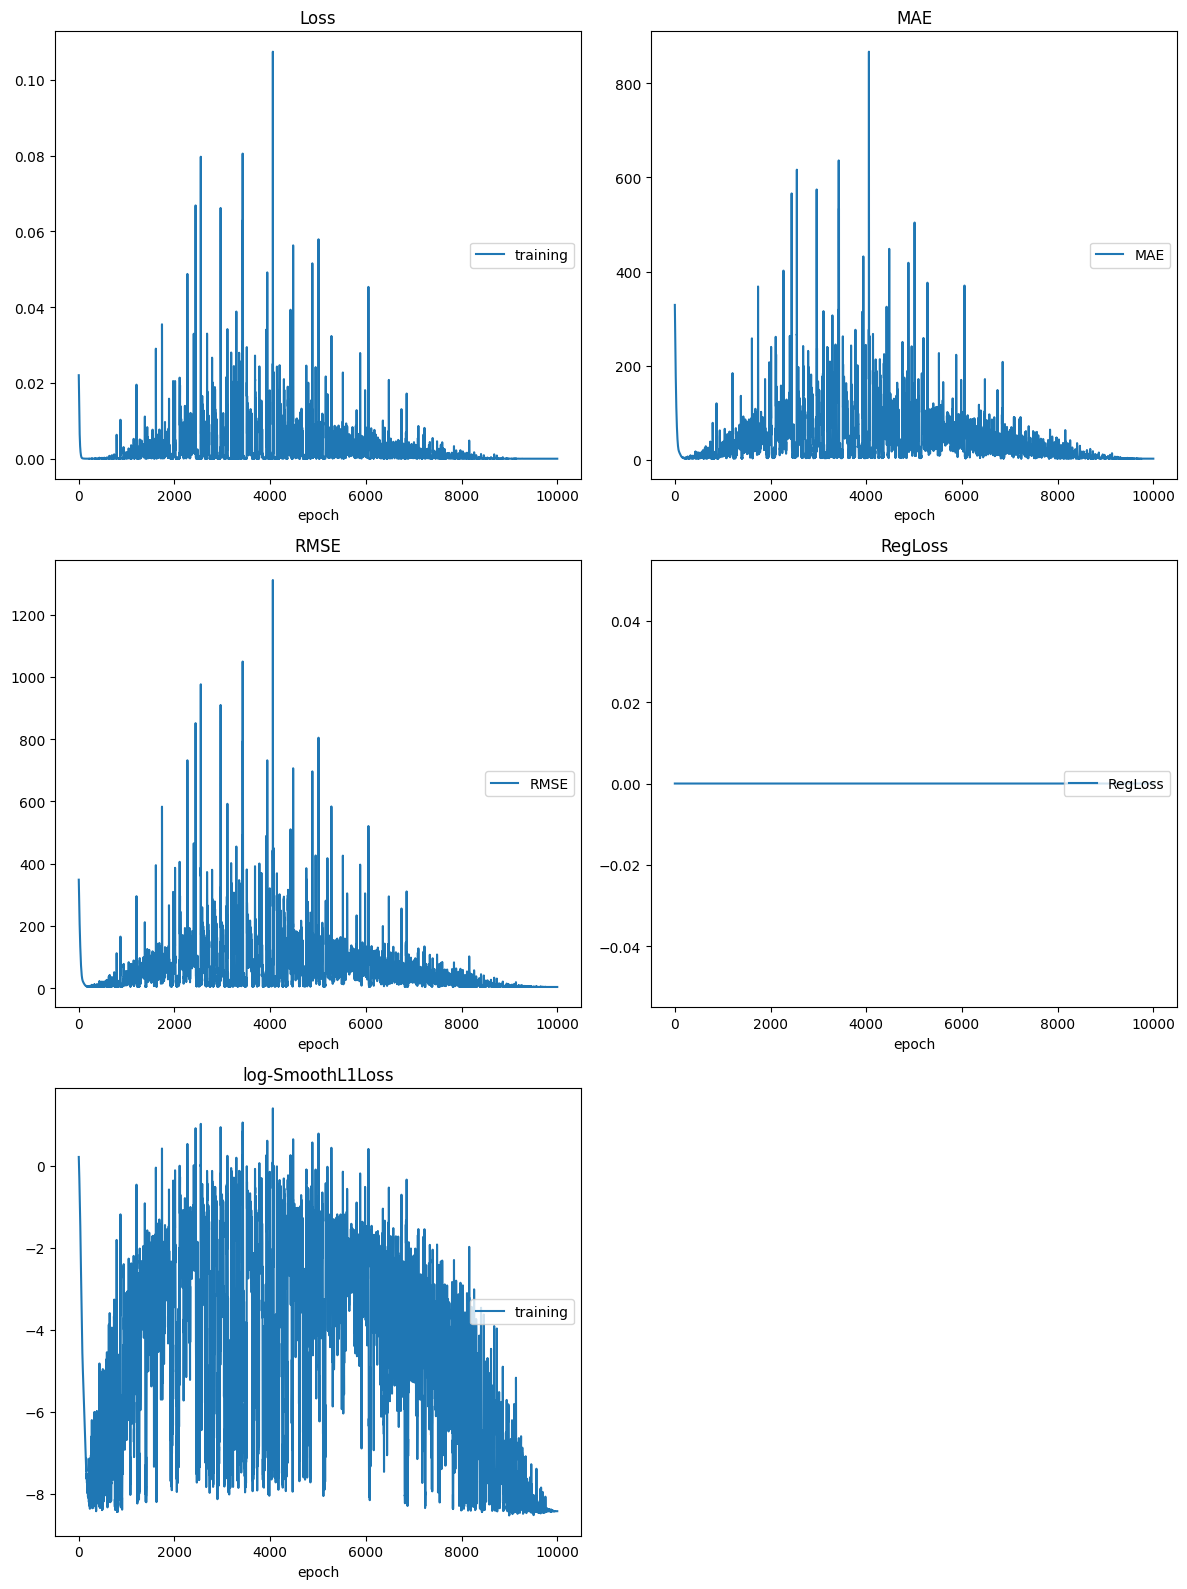

Loss
	training         	 (min:    0.000, max:    0.107, cur:    0.000)
MAE
	MAE              	 (min:    2.598, max:  867.040, cur:    2.671)
RMSE
	RMSE             	 (min:    3.706, max: 1311.609, cur:    3.891)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	training         	 (min:   -8.525, max:    1.398, cur:   -8.423)


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,1.237271,329.208484,348.649932,0.022039,0.0
1,1.191895,320.273560,339.683626,0.021111,0.0
2,1.149740,311.946861,331.553507,0.020153,0.0
3,1.105037,303.102499,322.404806,0.019323,0.0
4,1.061517,294.537079,313.781278,0.018331,0.0
...,...,...,...,...,...
9995,0.000220,2.670627,3.897033,0.000002,0.0
9996,0.000220,2.670651,3.869348,0.000002,0.0
9997,0.000220,2.670646,3.896390,0.000002,0.0
9998,0.000220,2.670637,3.823605,0.000002,0.0


In [90]:
m.fit(df_c, freq='MS',  progress='plot-all')

In [92]:
future = m.make_future_dataframe(df_train, periods=5)
forecast = m.predict(future)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.356% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,residual1,yhat1,trend,season_yearly
0,2022-06-01,None,NaN,292.628082,293.013306,-0.385197
1,2022-07-01,None,NaN,293.852875,293.570984,0.281914
2,2022-08-01,None,NaN,295.506714,294.147247,1.359438
3,2022-09-01,None,NaN,297.105377,294.723511,2.381861
4,2022-10-01,None,NaN,297.947693,295.281189,2.666522


In [83]:
print(forecast['yhat1'])
print(df_ans['y'])
df_forecast = forecast.drop(columns=['y', 'trend','season_yearly','residual1'])
df_forecast.rename(columns={'yhat1':'y'},inplace=True)
print(df_forecast)

0    292.667603
1    293.864899
2    295.490234
3    297.078064
4    297.961182
Name: yhat1, dtype: float64
0    294.354
1    295.275
2    296.950
3    298.660
4    299.471
Name: y, dtype: float64
          ds           y
0 2022-06-01  292.667603
1 2022-07-01  293.864899
2 2022-08-01  295.490234
3 2022-09-01  297.078064
4 2022-10-01  297.961182


In [93]:
print(mean_squared_error(df_ans['y'],df_forecast['y']))

2.349062180371714


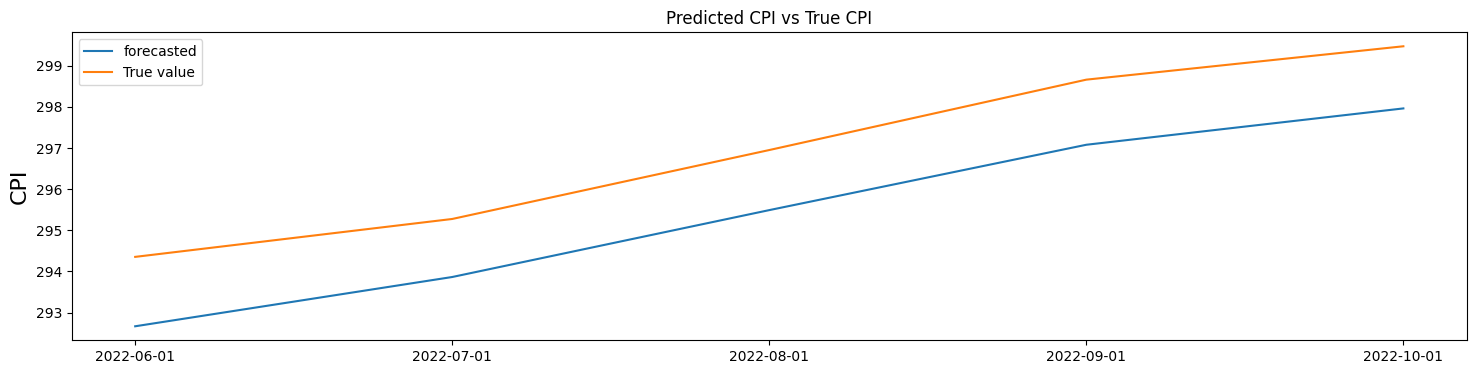

In [94]:
x = ['2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01','2022-10-01']
plt.figure(figsize=(18,4))
plt.ylabel('CPI', fontsize=16)
plt.title('Predicted CPI vs True CPI') 
plt.plot(x,df_forecast['y'],label='forecasted')
plt.plot(x,df_ans['y'], label='True value')
plt.legend(loc='best')
plt.show()

In [5]:
def sacf(array, lag):
    
    mu = np.mean(array)
    numera = 0
    denomina = 0
    for j in range (0,len(array)):
        denomina = denomina + np.power((array[j]-mu),2)
    print(mu, denomina)

    if (lag <= 1):
        for i in range (lag, len(array)):
            print(f'({array[i]}-mu) * ({array[i-lag]}-mu)')
            numera = numera + (array[i]-mu)*(array[i-lag]-mu)
        print(numera/denomina)

    if (lag > 1):
        for i in range (lag, len(array)):
            print(f'({array[i]}-mu) * ({array[i-lag]}-mu)')
            numera = numera + (array[i]-mu)*(array[i-lag]-mu)
        print(numera/denomina)
def ci(array, n):
    result = []
    base = 1.96/np.sqrt(n-1)
    result.append(base)
    pres = []
    pres.append(1)
    for i in range(0,len(array)-1):
        pres.append(2*np.power(array[i],2))
        result.append(base*np.sqrt(np.sum(pres)))
    print(result)

def ljb(array, n, k):
    temp = []
    for i in range(0,k):
        temp.append(np.power(array[i],2)/(n-i-1))
    result = n*(n+2)*np.sum(temp)
    print(result)
    

In [ ]:
array = [-.42, .15, .08, -.07, -.16, .04, -.03
]
n = 64
ci(array,n)